# Yelp Review Analysis #  
Analyse yelp reviews and extract customer sentiment

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.feature_extraction.text import TfidfTransformer


**Load the dataset**

In [22]:
yelp_df = pd.read_csv('yelp.csv')

In [23]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


**Visualize Dataset**  

In [24]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [25]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


**Visualize Data**

In [26]:
yelp_df['length'] = yelp_df['text'].apply(len)

In [27]:
yelp_df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,668
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,1425
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,880


<Axes: ylabel='Frequency'>

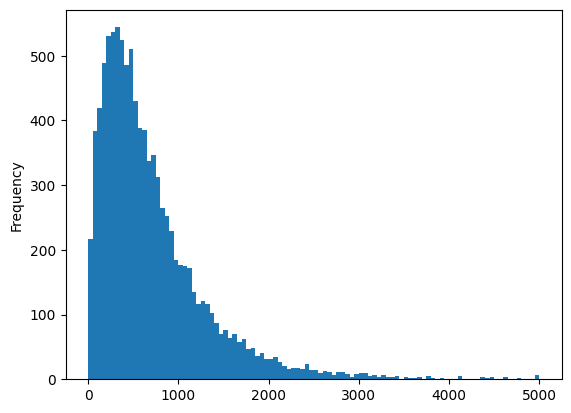

In [28]:
#Plot the hitogram of the length of the reviews
yelp_df['length'].plot(bins=100, kind='hist')

The average review is between 500 to 600 characters

Plotting the number of reviews with respect to ratings

<Axes: xlabel='count', ylabel='stars'>

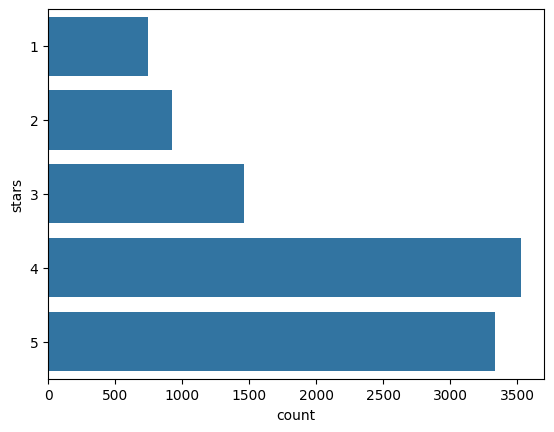

In [29]:
sns.countplot(y='stars', data=yelp_df)

Plotting the length of reviews based on review stars

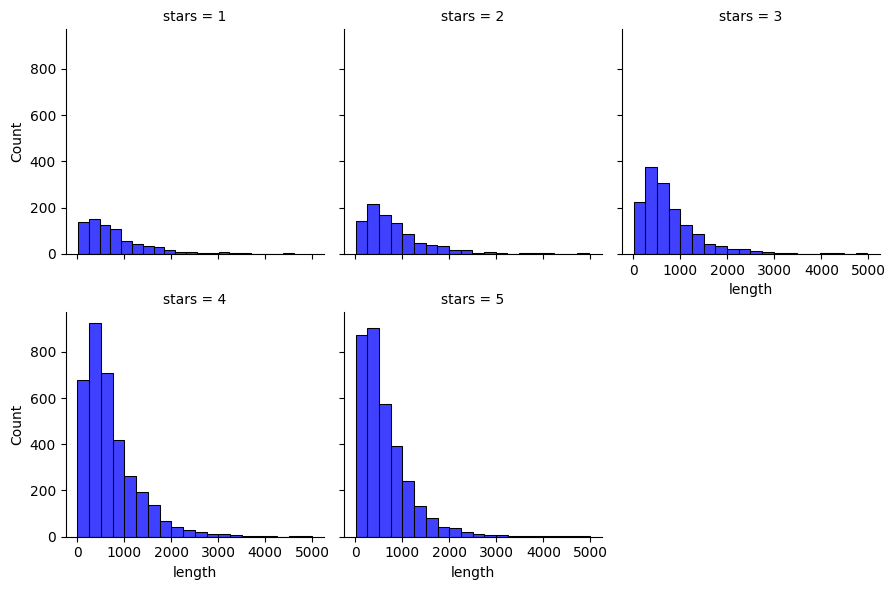

In [30]:
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=3)
g.map(sns.histplot, 'length', bins=20, color ='blue') #plot the length of the reviews for each star rating

We can see that length of review is comapritively less for 5 star rating reviews. But it does not give us much information about the data.

In [31]:
#Divide the reviews into 1 and 5 star ratings 
yelp_df_1 = yelp_df[yelp_df['stars'] == 1]
yelp_df_5 = yelp_df[yelp_df['stars'] == 5]
yelp_df_merged = pd.concat([yelp_df_1, yelp_df_5]) #merge the two dataframes
yelp_df_merged

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


<Axes: xlabel='count', ylabel='stars'>

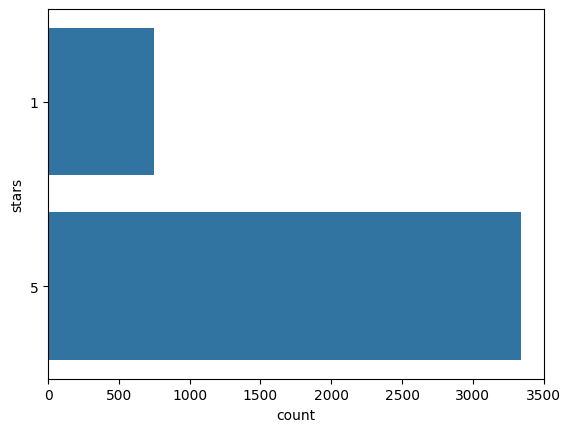

In [62]:
sns.countplot(y='stars', data=yelp_df_merged) #plot the count of the 1 and 5 star ratings

**Creating training testing dataset and Data cleaning**

In [34]:
#Create a function to remove punctuation and stopwords from the reviews
def text_process(text):
    text_cleaned = [char for char in text if char not in string.punctuation]
    text_cleaned = ''.join(text_cleaned)
    text_cleaned = [word for word in text_cleaned.split() if word.lower() not in stopwords.words('english')]
    return text_cleaned

In [35]:
#We are cleaning applying count vectorizer along with the text_process function
vectorizer = CountVectorizer(analyzer=text_process)
yelp_df_cv = vectorizer.fit_transform(yelp_df_merged['text'])

In [42]:
print(vectorizer.get_feature_names_out()) #print the feature names

['0' '00s' '01042012' ... 'École' 'éclairs' 'ém']


In [36]:
yelp_df_cv.shape #print the shape of the cv dataframe

(4086, 26435)

In [39]:
print(yelp_df_cv.toarray()) #print the cv dataframe

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Training the model**

In [64]:
classifier = MultinomialNB() #create a classifier
label = yelp_df_merged['stars'].values #extract the labels

In [47]:
classifier.fit(yelp_df_cv, label) #fit the classifier

MultinomialNB()

We have trained the model on the entire dataset and testing it with a sample data. The sample data is converted into count vectorized state before it is used for prediction with the model

In [52]:
testing_sample_1 = ['amazing food! highly recommended'] #create a testing sample
ts1_cv = vectorizer.transform(testing_sample_1) #transform the testing sample
ts1_predicted = classifier.predict(ts1_cv) #predict the testing sample
print(ts1_predicted) #print the prediction

[5]


In [50]:
testing_sample_2 = ['terrible food! do not recommend'] #create a testing sample
ts2_cv = vectorizer.transform(testing_sample_2) #transform the testing sample
ts2_predicted = classifier.predict(ts2_cv) #predict the testing sample
print(ts2_predicted) #print the prediction

[5]


Splitting into training and testing dataset

In [54]:
X = yelp_df_cv  # Features
y = label # Labels

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split the data into training and testing data

In [56]:
nb_classifier = MultinomialNB() #create a classifier
nb_classifier.fit(X_train, y_train) #fit the classifier

MultinomialNB()

**Model Evaluation**

In [61]:
y_predict_train = nb_classifier.predict(X_train) #predict the training data
y_predict_train #print the prediction

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

<Axes: >

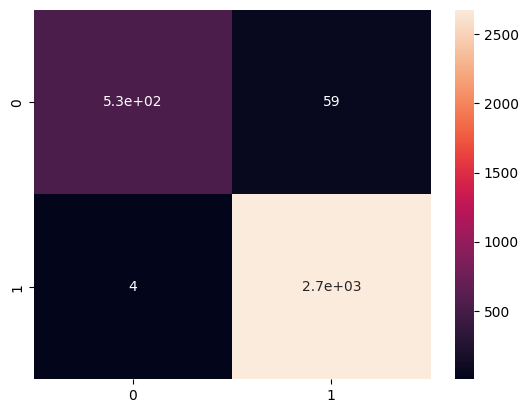

In [65]:
cm1 = confusion_matrix(y_train, y_predict_train) #create a confusion matrix
sns.heatmap(cm1, annot=True) #plot the confusion matrix

<Axes: >

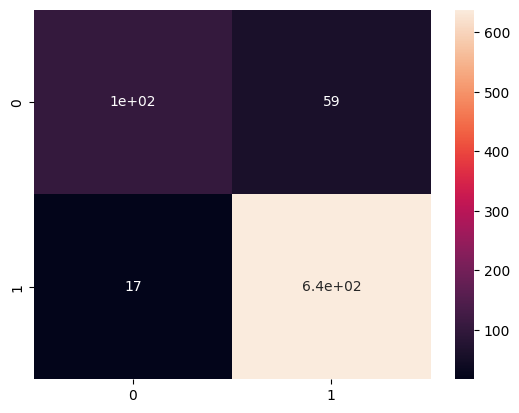

In [66]:
y_predict_test = nb_classifier.predict(X_test) #predict the testing data
cm2 = confusion_matrix(y_test, y_predict_test) #create a confusion matrix
sns.heatmap(cm2, annot=True) #plot the confusion matrix

In [67]:
#print classfication report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.86      0.64      0.73       163
           5       0.92      0.97      0.94       655

    accuracy                           0.91       818
   macro avg       0.89      0.81      0.84       818
weighted avg       0.90      0.91      0.90       818



Adding TF-IDF - Term frequency - inverse document frequency  
Studying the importance of a word in a corpus of documents

In [69]:
yelp_tf_idf = TfidfTransformer().fit_transform(yelp_df_cv) #create a tf-idf transformer
print(yelp_tf_idf.shape) #print the shape of the tf-idf dataframe

(4086, 26435)


In [71]:
print(yelp_tf_idf[:,:]) #print the tf-idf dataframe

  (0, 26268)	0.08050274254786693
  (0, 26228)	0.09348620453726474
  (0, 26144)	0.07169873884062605
  (0, 26045)	0.15817660070664968
  (0, 25776)	0.06066174442364943
  (0, 25773)	0.12002965112412296
  (0, 25418)	0.14546095084580743
  (0, 25122)	0.2703898166869907
  (0, 24911)	0.14546095084580743
  (0, 24670)	0.12383875478045604
  (0, 24644)	0.13058459416402163
  (0, 24623)	0.04459768543876988
  (0, 24154)	0.06030465665278142
  (0, 23120)	0.09876367605721408
  (0, 22450)	0.09315710247790514
  (0, 22430)	0.1097636086218109
  (0, 22000)	0.06662808805692144
  (0, 21801)	0.13058459416402163
  (0, 20785)	0.09005184530467268
  (0, 19733)	0.14546095084580743
  (0, 19354)	0.09547907116641852
  (0, 19039)	0.12613266766643505
  (0, 18911)	0.1133722206104443
  (0, 18805)	0.10789642494273591
  (0, 18740)	0.08834411964653922
  :	:
  (4085, 16843)	0.12124793979515064
  (4085, 15626)	0.056073903602148346
  (4085, 15041)	0.08518302578980794
  (4085, 14689)	0.13505937049458547
  (4085, 14480)	0.085183025

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       163
           5       0.80      1.00      0.89       655

    accuracy                           0.80       818
   macro avg       0.40      0.50      0.44       818
weighted avg       0.64      0.80      0.71       818



c:\Users\subin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\subin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\subin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


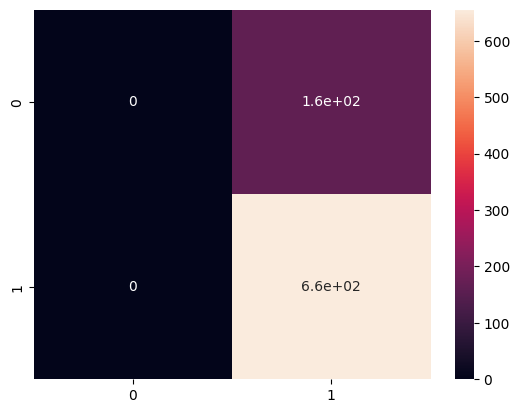

In [72]:
X= yelp_tf_idf # Features
y = label # Labels
classifier_1 = MultinomialNB() #create a classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split the data into training and testing data

classifier_1.fit(X_train, y_train) #fit the classifier

y_predict_test = classifier_1.predict(X_test) #predict the testing data
cm = confusion_matrix(y_test, y_predict_test) #create a confusion matrix
sns.heatmap(cm, annot=True) #plot the confusion matrix
print(classification_report(y_test, y_predict_test)) #print the classification report

Using TF-IDF did not produce a good accuracy compared to our previous model. This is just another feature extraction method that may provide better accuracy for other data